In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.text import *

In [4]:
path='/home/jupyter/datascience/nlp-disaster-tweet-kaggle/data'

In [5]:
train_df=pd.read_csv(path+'/train.csv')
train_df.head()
df_lm=train_df[['id','text']]
df_lm.shape

(7613, 2)

In [8]:
test_df=pd.read_csv(path+'/test.csv')
test_df.head()
test_df_lm=test_df[['id','text']]
test_df_lm.head()
test_df_lm.shape

(3263, 2)

In [9]:
df_lm.append(test_df_lm,ignore_index=True)

,id,text
0,1,Our Deeds are the Reason of this #earthquake M...
1,4,Forest fire near La Ronge Sask. Canada
2,5,All residents asked to 'shelter in place' are ...
3,6,"13,000 people receive #wildfires evacuation or..."
4,7,Just got sent this photo from Ruby #Alaska as ...
...,...,...
10871,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872,10865,Storm in RI worse than last hurricane. My city...
10873,10868,Green Line derailment in Chicago http://t.co/U...
10874,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [15]:
doc(TextList.from_csv)

In [22]:
train_df_lm = df_lm.loc[:5486,:]
valid_df_lm =df_lm.loc[5486:,:]

In [23]:
valid_df_lm.shape

(2127, 2)

In [24]:
data_lm=TextLMDataBunch.from_df(".", train_df_lm, valid_df_lm, text_cols=['text'], bs=64)

In [30]:
data_lm.train_ds

LabelList (5487 items)
x: LMTextList
xxbos xxmaj our xxmaj deeds are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj forgive us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxmaj all residents asked to ' shelter in place ' are being xxunk by officers . xxmaj no other evacuation or shelter in place orders are expected,xxbos xxunk people receive # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school
y: LMLabelList
,,,,
Path: .

In [31]:
data_lm.save('data_lm.pkl')

In [27]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


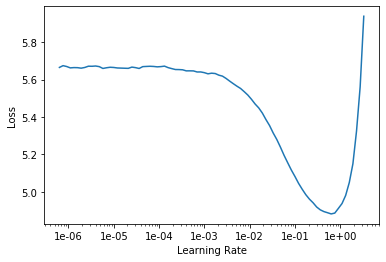

In [32]:
learn.recorder.plot()

In [10]:
doc(language_model_learner)

In [17]:
#data_lm=load_data(path=".",file='data_lm.pkl',bs=64)

In [18]:
data_lm.show_batch()

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,comment on the accident issue and xxunk xxunk # xxunk xxbos @aftershock_delo scuf ps live and the game ... xxunk xxbos ' xxmaj the man who can drive himself further once the effort gets xxunk is the man who will win . ' \n xxmaj roger xxmaj xxunk xxbos 320 [ xxup ir ] xxup icemoon [ xxup aftershock ] | http : / / t.co / xxunk |
2,an ambulance xxbos @fouseytube you ok ? xxmaj need a ambulance . xxmaj hahahah that was good ! http : / / t.co / xxunk xxbos xxup ambulance xxup sprinter xxup automatic xxup frontline xxup vehicle xxup choice xxup of 14 xxup lez xxup compliant | ebay http : / / t.co / xxunk xxbos xxmaj pakistan air ambulance helicopter crash kills nine http : / / t.co / xxunk
3,xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... https : / / t.co / xxunk via @change xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... http : / / t.co / xxunk via @change xxbos i 'm gon na fight xxmaj
4,pick for http : / / t.co / thoyhrhkfj xxmaj fan xxmaj army # xxmaj beyhive http : / / t.co / wvj39a3bgm xxbos xxmaj one xxmaj direction xxmaj is my pick for http : / / t.co / q2eblokeve xxmaj fan xxmaj army # xxmaj directioners http : / / t.co / encmhz6y34 xxunk xxbos xxmaj seeing that army of xxunk was the very first thing that has slightly


In [19]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [34]:
doc(learn.fit_one_cycle)

In [36]:
learn.fit_one_cycle(2,max_lr=slice(1e-2,1e+0),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,12.513618,11.898372,0.228623,00:04
1,10.789666,6.752077,0.316707,00:04


In [37]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(10,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.893433,4.661760,0.350893,00:04
1,5.180482,4.725414,0.311916,00:04
2,4.673026,4.144806,0.371720,00:04
3,4.268932,4.053169,0.392239,00:04
4,3.934110,4.015040,0.392703,00:04
5,3.642281,4.006772,0.395707,00:04
6,3.381626,4.061042,0.396927,00:04
7,3.118420,4.164433,0.394334,00:04
8,2.871235,4.312879,0.390556,00:04
9,2.672242,4.359662,0.390385,00:04


In [39]:
learn.save("language_model_unfreeze")

In [40]:
learn.save_encoder("language_model_unfreeze_encoder")

In [41]:
## We now start classifier to use language model we used both train and test data . Now we will only use train data

In [70]:
train_df_classifier=pd.read_csv(path+'/train.csv')
train_df_classifier.head()
df_lm_classifier=train_df_classifier[['text','target']]
df_lm_classifier.shape
df_lm_classifier

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [71]:
data_classifier=(TextList.from_df(df_lm_classifier,vocab=data_lm.vocab)
                 .split_by_idx(list(range(5486,7613)))
                 .label_from_df(cols=1)
                 .databunch(bs=64))

In [72]:
data_classifier.show_batch()

text,target
xxbos _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup followback \n xxrep 7 ? \n xxrep 5 ? xxup gain xxup with \n xxrep 7 ? \n xxrep 5 ? xxup follow ? xxunk # xxup xxunk,0
xxbos . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : . : xxup rt xxunk : # xxunk \n \n xxmaj indian xxmaj army xxunk _ http : / / t.co / xxunk g,0
xxbos xxup info xxup u. xxup cld : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : 030 / 6 .,0
xxbos xxup info xxup s. xxup wnd : 030 / 6 . xxup cld : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0
xxbos xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1


In [81]:
learner=text_classifier_learner(data_classifier,AWD_LSTM,pretrained=True,drop_mult=0.5)
learner.load_encoder("language_model_unfreeze_encoder")

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5486 items)
x: TextList
xxbos xxmaj our xxmaj deeds are the xxmaj reason of this # earthquake xxmaj may xxup allah xxmaj forgive us all,xxbos xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxmaj all residents asked to ' shelter in place ' are being xxunk by officers . xxmaj no other evacuation or shelter in place orders are expected,xxbos xxunk people receive # wildfires evacuation orders in xxmaj california,xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (2127 items)
x: TextList
xxbos xxmaj yet another company trying to xxunk the xxmaj internet . xxmaj reddit has started to quarantine their content : http : / / t.co / xxunk # cc,xxbos xxmaj reddit xxmaj will xxmaj now xxmaj quarantine xxmaj offensive xxmaj content : xxmaj reddit co - founder and xxup ceo xxmaj steve xxmaj huffman has 

In [82]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


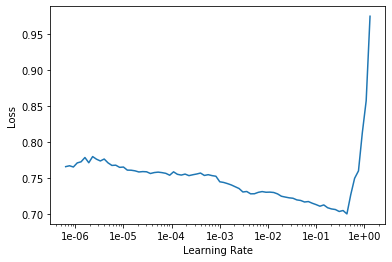

In [83]:
learner.recorder.plot()

In [84]:
learner.fit_one_cycle(4,max_lr=slice(1e-03,1e-01),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.670025,0.610266,0.690644,00:05
1,0.653119,0.599079,0.661495,00:05
2,0.621837,0.599902,0.661495,00:05
3,0.599594,0.583471,0.695346,00:05


In [85]:
learner.freeze_to(-3)
learner.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.575691,0.562232,0.716502,00:05


In [86]:
learner.unfreeze()
learner.fit_one_cycle(10, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.557964,0.555282,0.715092,00:05
1,0.548551,0.545166,0.721204,00:05
2,0.514159,0.515036,0.733898,00:06
3,0.482941,0.548533,0.721674,00:05
4,0.455529,0.506849,0.750823,00:05
5,0.416786,0.534059,0.743300,00:05
6,0.389796,0.520761,0.752233,00:05
7,0.354320,0.532615,0.749412,00:05
8,0.335990,0.545081,0.748002,00:05
9,0.330740,0.569493,0.746121,00:06


In [87]:
learner.save("text-classifier")

In [88]:
learner.save_encoder("text-classifier-encoder")

In [90]:
test = pd.read_csv(path+'/test.csv',header=0)

In [91]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [92]:
predictions=pd.DataFrame()

In [93]:
for i,t in test.iterrows():
    predictions.loc[i,"target"] = learner.predict(t["text"])[0]

In [94]:
predictions.head()

,target
0,1
1,1
2,1
3,1
4,1


In [95]:
predictions["id"]=test.id

In [106]:
predictions.iloc[101]

target      0
id        342
Name: 101, dtype: object

In [ ]:
predictions[["id","target"]].to_csv("submission.csv",index=False)